In [1]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --user imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

In [5]:
df = pd.read_csv('covid.csv')

In [6]:
df.isnull()

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566598,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566599,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566600,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
Y = df['icu']
X = df[[i for i in df.columns if i!='icu']]
X

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
0,2,1,4/5/2020,2/5/2020,9999-99-99,97,2,27,97,2,...,2,2,2,2,2,2,2,2,2,1
1,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,...,2,2,2,2,2,2,2,2,99,1
2,1,2,6/4/2020,1/4/2020,9999-99-99,2,2,54,2,2,...,2,2,2,2,2,1,2,2,99,1
3,2,2,17-04-2020,10/4/2020,9999-99-99,2,1,30,97,2,...,2,2,2,2,2,2,2,2,99,1
4,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,...,2,2,1,2,1,2,2,2,99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,2,1,13-05-2020,3/5/2020,9999-99-99,97,2,58,97,1,...,2,2,2,2,2,2,2,2,2,3
566598,1,1,7/4/2020,6/4/2020,9999-99-99,97,2,48,2,2,...,2,2,2,2,2,2,2,2,2,3
566599,1,2,14-05-2020,1/5/2020,9999-99-99,2,1,49,2,2,...,2,2,2,2,2,1,2,2,99,3
566600,1,1,31-05-2020,29-05-2020,9999-99-99,97,1,43,2,2,...,2,2,2,2,2,2,2,2,2,3


In [8]:
Y = df['icu']
X = df[[i for i in df.columns if i!='icu' and df[i].dtype in [np.int64, np.float64]]]
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state = 1)


In [9]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(train_X, train_Y)

In [10]:
rfc_model.predict_proba([train_X.loc[21693]])

array([[0., 0., 1., 0.]])

In [11]:
train_Y[21693]

97

In [12]:
rfc_model.predict([train_X.loc[21693]])

array([97], dtype=int64)

In [13]:
y_predict = rfc_model.predict(val_X)
print(classification_report(val_Y, y_predict))

              precision    recall  f1-score   support

           1       0.46      0.28      0.35      2530
           2       0.94      0.97      0.95     27838
          97       1.00      1.00      1.00    111253
          99       1.00      1.00      1.00        30

    accuracy                           0.98    141651
   macro avg       0.85      0.81      0.82    141651
weighted avg       0.98      0.98      0.98    141651



Confusion matrix, without normalization
[[   703   1827      0      0]
 [   837  27001      0      0]
 [     0      0 111253      0]
 [     0      0      0     30]]
Normalized confusion matrix
[[0.27786561 0.72213439 0.         0.        ]
 [0.03006682 0.96993318 0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         1.        ]]


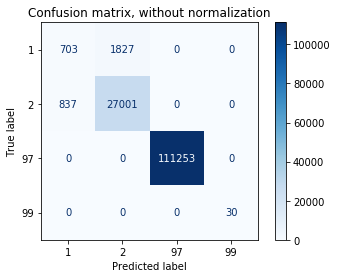

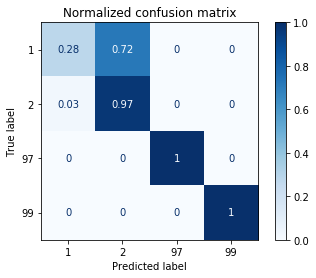

In [14]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rfc_model, val_X, val_Y,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


# SHAP

 97%|=================== | 387/400 [00:25<00:00]       

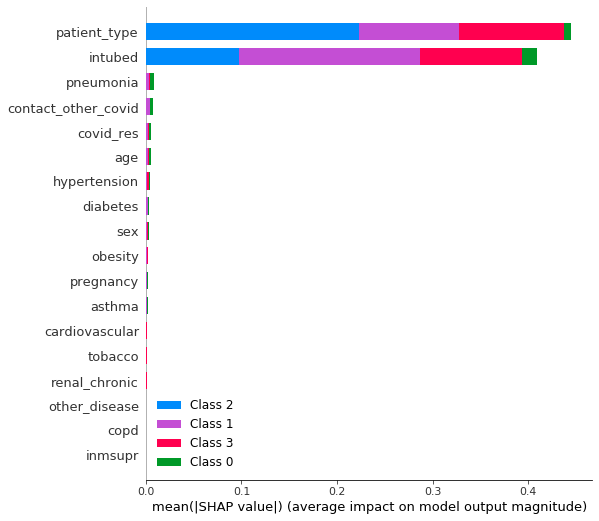

In [15]:
subset_to_explain = val_X.iloc[0:100]
explainer = shap.TreeExplainer(rfc_model, subset_to_explain)
shap_values = explainer.shap_values(subset_to_explain)
shap.initjs()
shap.summary_plot(shap_values, subset_to_explain)

In [16]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], subset_to_explain)

In [17]:
sgdc = SGDClassifier()
sgdc_model = sgdc.fit(train_X, train_Y)

In [18]:
sgdc_model.predict([train_X.loc[18060]])

array([2], dtype=int64)

In [19]:
train_Y.loc[18060]

2

In [20]:
pred_Y = sgdc_model.predict(val_X)
print(classification_report(val_Y, pred_Y))

              precision    recall  f1-score   support

           1       0.50      0.12      0.19      2530
           2       0.93      0.99      0.96     27838
          97       1.00      1.00      1.00    111253
          99       0.00      0.00      0.00        30

    accuracy                           0.98    141651
   macro avg       0.61      0.53      0.54    141651
weighted avg       0.98      0.98      0.98    141651



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Confusion matrix, without normalization
[[   302   2228      0      0]
 [   302  27536      0      0]
 [     0      0 111253      0]
 [     0      0     30      0]]
Normalized confusion matrix
[[0.11936759 0.88063241 0.         0.        ]
 [0.01084848 0.98915152 0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         1.         0.        ]]


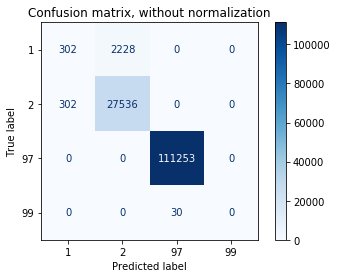

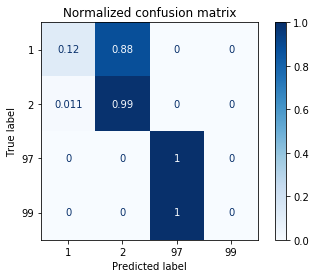

In [21]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(sgdc_model, val_X, val_Y,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


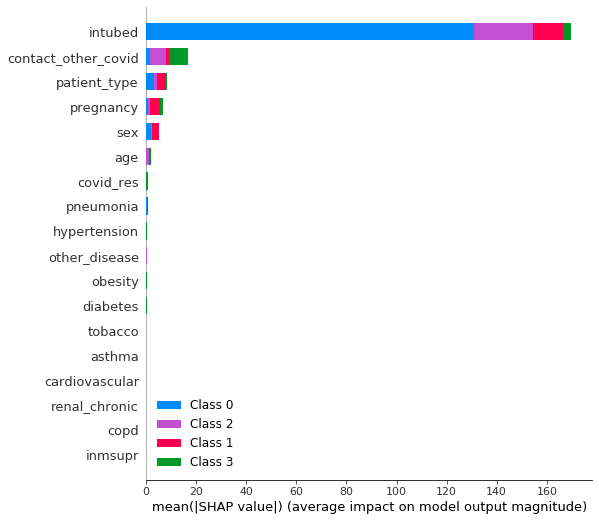

In [22]:
explainer = shap.LinearExplainer(sgdc_model, subset_to_explain)
shap_values = explainer.shap_values(subset_to_explain)
shap.initjs()
shap.summary_plot(shap_values, subset_to_explain)

In [ ]:
print("Number transactions X_train dataset: ", train_X.shape)
print("Number transactions y_train dataset: ", train_Y.shape)
print("Number transactions X_test dataset: ", val_X.shape)
print("Number transactions y_test dataset: ", val_Y.shape)

# SMOTE

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(train_Y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(train_Y==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(train_X, train_Y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

No handles with labels found to put in legend.


Counter({97: 444689, 2: 111676, 1: 10112, 99: 125})
Counter({97: 444689, 2: 111676, 1: 10112, 99: 125})


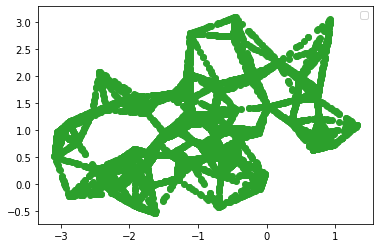

In [50]:
from collections import Counter
from sklearn.datasets import make_classification
from numpy import where

counter = Counter(Y)
print(counter)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(Y)
print(counter)
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.legend()
pyplot.show()


# ADASYN

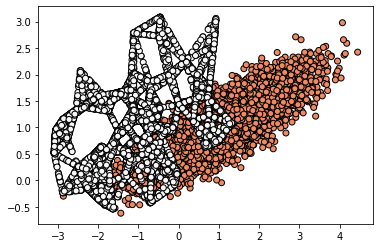

In [51]:
from imblearn.over_sampling import ADASYN

X_resampled, y_resampled = ADASYN().fit_sample(X, y)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
